In [58]:
from fastai.collab import *

In [59]:
from fastai.tabular import *

In [60]:
user,item,title = 'userId', 'movieId', 'title'

# Collab filtering exemple

In [3]:
# path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/home/jupyter/.fastai/data/movie_lens_sample')

In [4]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/movie_lens_sample/ratings.csv')]

In [5]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

userId  movieId  rating   timestamp
0      73     1097     4.0  1255504951
1     561      924     3.5  1172695223
2     157      260     3.5  1291598691
3     358     1210     5.0   957481884
4     130      316     2.0  1138999234

In [7]:
type(ratings)

pandas.core.frame.DataFrame

In [8]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [11]:
y_range = [ 0, 5.5]

In [12]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [13]:
learn.fit_one_cycle(3, 5e-3)

# Movielens 100k

## dwnload dataset

In [61]:
path = Config.data_path()/'ml-100k/ml-100k'

In [62]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/u5.base'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/u.data'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/u.item'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/u2.test'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/u4.base'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/u3.base'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/u3.test'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/u.user'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/mku.sh'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/u4.test'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/ub.base'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/ua.test'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/ub.test'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/u.genre'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/u.info'),
 PosixPath('/ho

In [21]:
# path.mkdir(parents=True)

In [18]:
# import requests, zipfile, io

In [33]:
# with requests.get('http://files.grouplens.org/datasets/movielens/ml-100k.zip') as r:
#     z = zipfile.ZipFile(io.BytesIO(r.content))
#     z.extractall(path)
    

## prepare DataFrame

In [63]:
path

PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k')

In [64]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/u5.base'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/u.data'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/u.item'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/u2.test'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/u4.base'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/u3.base'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/u3.test'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/u.user'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/mku.sh'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/u4.test'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/ub.base'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/ua.test'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/ub.test'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/u.genre'),
 PosixPath('/home/jupyter/.fastai/data/ml-100k/ml-100k/u.info'),
 PosixPath('/ho

In [82]:
ratings = pd.read_csv(path/'u.data',
                      delimiter='\t', #'\t' = tab
                      header=None,
                      names=[user,item,'rating','timestamp'])
ratings.head()

userId  movieId  rating  timestamp
0     196      242       3  881250949
1     186      302       3  891717742
2      22      377       1  878887116
3     244       51       2  880606923
4     166      346       1  886397596

In [66]:
movies = pd.read_csv( path/'u.item', 
                       delimiter='|', 
                       encoding='latin-1', header=None,
                       names=[ item, 'title', 'date', 'N', 'url', 
                              *[f'g{i}' for i in range(19)]])
movies.head()


movieId              title         date   N  \
0        1   Toy Story (1995)  01-Jan-1995 NaN   
1        2   GoldenEye (1995)  01-Jan-1995 NaN   
2        3  Four Rooms (1995)  01-Jan-1995 NaN   
3        4  Get Shorty (1995)  01-Jan-1995 NaN   
4        5     Copycat (1995)  01-Jan-1995 NaN   

                                                 url  g0  g1  g2  g3  g4  ...  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...   0   0   0   1   1  ...   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...   0   1   1   0   0  ...   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...   0   0   0   0   0  ...   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...   0   1   0   0   0  ...   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)   0   0   0   0   0  ...   

   g9  g10  g11  g12  g13  g14  g15  g16  g17  g18  
0   0    0    0    0    0    0    0    0    0    0  
1   0    0    0    0    0    0    0    1    0    0  
2   0    0    0    0    0    0    0    1    0    0  
3   0    0    0    0    0    0    0    0    0    0  
4   0    0    0    0    0    0    0    1    0    0  

[5 rows x 24 columns]

In [67]:
len(ratings)

100000

In [86]:
rating_movies = ratings.merge(movies[[item, title]])
rating_movies.head()

userId  movieId  rating  timestamp         title
0     196      242       3  881250949  Kolya (1996)
1      63      242       3  875747190  Kolya (1996)
2     226      242       5  883888671  Kolya (1996)
3     154      242       3  879138235  Kolya (1996)
4     306      242       5  876503793  Kolya (1996)

## Learner

In [88]:
data = CollabDataBunch.from_df( rating_movies, 
                                seed=42,
                                valid_pct=.1,
                                item_name=title)

In [89]:
data.show_batch()

In [90]:
y_range = [0, 5.5]

In [99]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

In [100]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


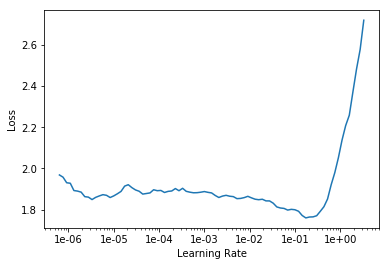

In [101]:
learn.recorder.plot()

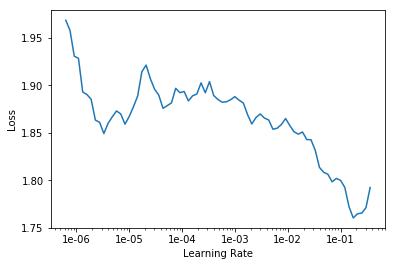

In [102]:
learn.recorder.plot(skip_end=17)

In [103]:
learn.fit_one_cycle(5, 5e-3)

In [104]:
learn.save('dotprod')

## Interpretation

### Setup

In [105]:
learn.load('dotprod')

CollabLearner(data=TabularDataBunch;

Train: LabelList (90000 items)
x: CollabList
userId 196; title Kolya (1996); ,userId 63; title Kolya (1996); ,userId 226; title Kolya (1996); ,userId 154; title Kolya (1996); ,userId 306; title Kolya (1996); 
y: FloatList
3.0,3.0,5.0,3.0,5.0
Path: .;

Valid: LabelList (10000 items)
x: CollabList
userId 498; title Casino (1995); ,userId 642; title Pocahontas (1995); ,userId 58; title 2001: A Space Odyssey (1968); ,userId 495; title Cat People (1982); ,userId 618; title Philadelphia (1993); 
y: FloatList
3.0,5.0,4.0,3.0,3.0
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=FlattenedLoss of MSELoss(), metrics=[], true_wd=True, bn_wd=True, wd=0.1, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<clas

In [106]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

Sort ratings by movies and count

In [127]:
g = rating_movies.groupby(title)['title'].count()
g[:15]

title
'Til There Was You (1997)                        9
1-900 (1994)                                     5
101 Dalmatians (1996)                          109
12 Angry Men (1957)                            125
187 (1997)                                      41
2 Days in the Valley (1996)                     93
20,000 Leagues Under the Sea (1954)             72
2001: A Space Odyssey (1968)                   259
3 Ninjas: High Noon At Mega Mountain (1998)      5
39 Steps, The (1935)                            59
8 1/2 (1963)                                    38
8 Heads in a Duffel Bag (1997)                   4
8 Seconds (1994)                                 4
A Chef in Love (1996)                            8
Above the Rim (1994)                             5
Name: title, dtype: int64

Show most rated movies

In [148]:
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:5]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)'],
      dtype=object)

### Movie Bias

In [139]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [140]:
mean_ratings = rating_movies.groupby(title)['rating'].mean()
mean_ratings[:5]

title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: rating, dtype: float64

In [141]:
movies_ratings = [(b,i, mean_ratings.loc[i]) for i,b in zip(top_movies, movie_bias)]
movies_ratings[:5]

[(tensor(0.5140), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.3954), 'Contact (1997)', 3.8035363457760316),
 (tensor(0.3885), 'Fargo (1996)', 4.155511811023622),
 (tensor(0.3834), 'Return of the Jedi (1983)', 4.007889546351085),
 (tensor(0.0760), 'Liar Liar (1997)', 3.156701030927835)]

In [142]:
item0 = lambda o:o[0]

In [144]:
sorted(movies_ratings, key=item0)[:15]

[(tensor(-0.3544),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3244),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.3101), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2816), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2583), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2484), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2477), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2458), 'Beautician and the Beast, The (1997)', 2.313953488372093),
 (tensor(-0.2451), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2422), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2422), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2284), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2262), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2201), 'Beverly Hills Ninja (1997)', 2.3125),
 (tensor(-0.2172), 'Showgi

In [145]:
sorted(movies_ratings, key=item0, reverse=True)[:15]

[(tensor(0.5995), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5836), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5734), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5480), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5358), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.5261), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5226), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5140), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5077), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4942), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4937), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4654), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4634), 'Close Shave, A (1995)', 4.491071428571429),
 (tensor(0.4550), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.4524), 'Godfather, The (1972)', 4.283292978208232)]

### Movies Weights

In [146]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 40])

In [150]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [153]:
fac0, fac1, fac2 = movie_pca.t()
movie_comp = [(f,i) for f,i in zip(fac0, top_movies)]
movie_comp[:5]

[(tensor(0.6656), 'Star Wars (1977)'),
 (tensor(-0.0295), 'Contact (1997)'),
 (tensor(0.9385), 'Fargo (1996)'),
 (tensor(0.1739), 'Return of the Jedi (1983)'),
 (tensor(-0.6282), 'Liar Liar (1997)')]

In [155]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.1350), 'Wrong Trousers, The (1993)'),
 (tensor(1.0721), 'Close Shave, A (1995)'),
 (tensor(1.0721), 'Chinatown (1974)'),
 (tensor(1.0140), 'When We Were Kings (1996)'),
 (tensor(0.9935),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)'),
 (tensor(0.9935), 'Manchurian Candidate, The (1962)'),
 (tensor(0.9831), 'Casablanca (1942)'),
 (tensor(0.9708), 'Lawrence of Arabia (1962)'),
 (tensor(0.9607), 'Third Man, The (1949)'),
 (tensor(0.9606), 'Godfather, The (1972)')]

In [156]:
movie_comp2 = [(f,i) for f,i in zip(fac1, top_movies)]

In [157]:
sorted(movie_comp2, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.8629), 'Beavis and Butt-head Do America (1996)'),
 (tensor(0.8527), 'Brazil (1985)'),
 (tensor(0.8309), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(0.8292), 'Trainspotting (1996)'),
 (tensor(0.7899), 'Very Brady Sequel, A (1996)'),
 (tensor(0.7851), 'Dead Man (1995)'),
 (tensor(0.7801), 'Lost Highway (1997)'),
 (tensor(0.7746), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(0.7577), 'Cable Guy, The (1996)'),
 (tensor(0.7538), 'Clockwork Orange, A (1971)')]

In [158]:
sorted(movie_comp2, key=itemgetter(0), reverse=False)[:10]

[(tensor(-1.1815), 'Braveheart (1995)'),
 (tensor(-1.0385), 'Raiders of the Lost Ark (1981)'),
 (tensor(-1.0049), 'Titanic (1997)'),
 (tensor(-0.9440), "It's a Wonderful Life (1946)"),
 (tensor(-0.8819), 'American President, The (1995)'),
 (tensor(-0.8676), 'Sleepless in Seattle (1993)'),
 (tensor(-0.8635), 'Pretty Woman (1990)'),
 (tensor(-0.8518), 'Affair to Remember, An (1957)'),
 (tensor(-0.8419), 'Lion King, The (1994)'),
 (tensor(-0.8392), "Mr. Holland's Opus (1995)")]

In [162]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs[:5]

array([453,  32, 436, 593, 187])

In [161]:
idxs = list(range(50))
idxs[:5]

[0, 1, 2, 3, 4]

In [163]:
X = fac0[idxs]
Y = fac2[idxs]

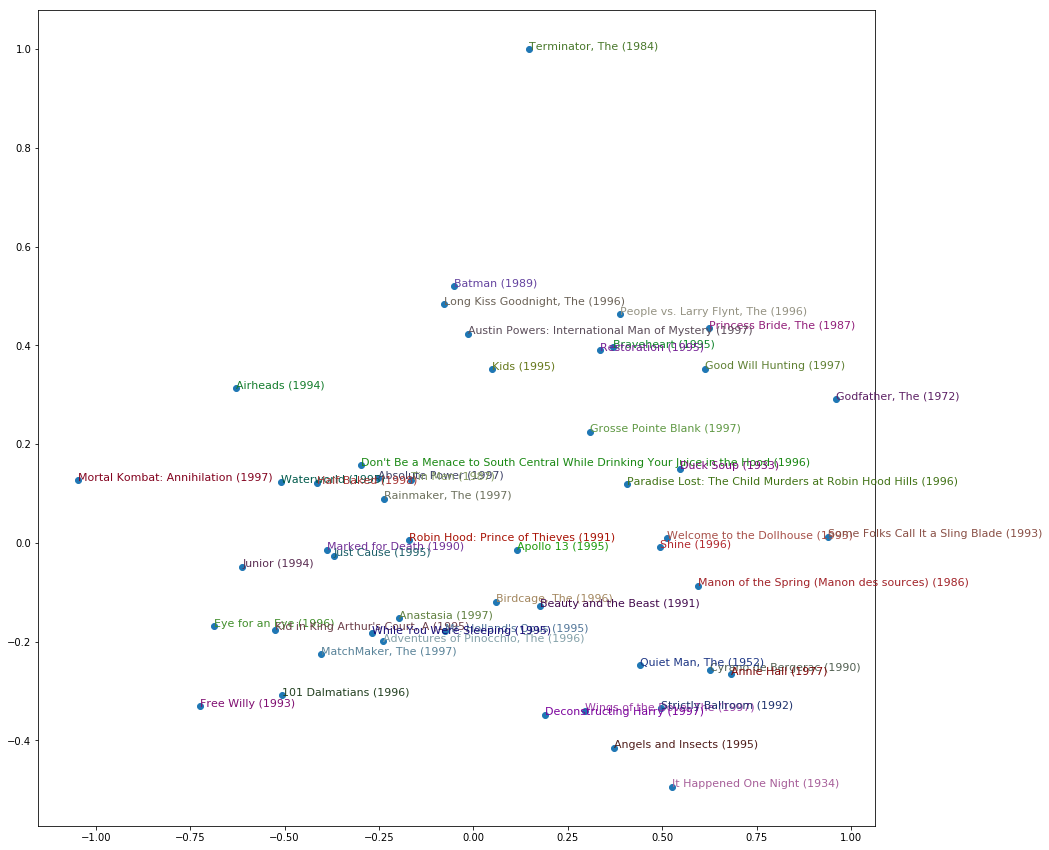

In [166]:
plt.figure(figsize=(15,15))
plt.scatter(X,Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x, y, i, color=np.random.rand(3)*.7, fontsize=11)
plt.show()